<a href="https://colab.research.google.com/github/gimikk/Colorization_for_BuddistArt/blob/master/%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# pytorch 설치 명령어 입니다
!pip3 install torch torchvision

In [20]:
# np.dot과 np.matmul 둘 다 알아두자!
import numpy as np

x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])

v = np.array([9,10])
w = np.array([11, 12])

# vector and vector
print(np.dot(v, w))
print(np.matmul(v, w))

# vector and matrix
print(np.dot(v, x))
print(np.matmul(v, x))

# matrix and vector
print(np.dot(x, v))
print(np.matmul(x, v))

# matrix and matrix
print(np.dot(x, y))
print(np.matmul(x, y))

219
219
[39 58]
[39 58]
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


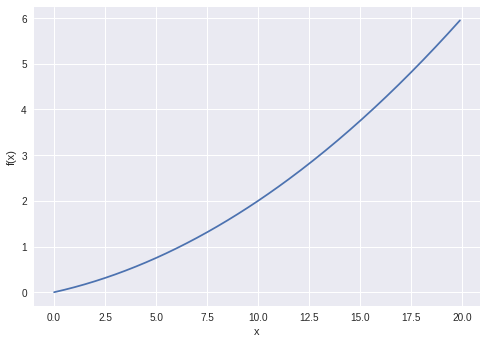

0.1999999999990898
0.2999999999986347
19.99999999995339
[0. 4.]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [0]:
# 수치 미분
import numpy as np
import matplotlib.pylab as plt

# 파이썬은 파라미터로 함수도 받을 수 있다
# f는 함수
def numerical_diff(f, x):
  h = 1e-4 # 0.0001 보통 많이 쓰는 h값
  #return (f(x+h) - f(x)) / h     # 전향차분
  return (f(x+h) - f(x-h))/ (2*h)# 중앙(중심)차분이 가장 정확함!

def function1(x):
  return 0.01*x**2 + 0.1*x

# 편미분, x0, x1
def function2(x):
  return np.sum(x**2)

# 수치적 gradient를 구하는법
def numerical_gradient(f ,x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 shape가 같은 array 생성
  
  for idx in range(x.size):
    tmp_val = x[idx]
    
    x[idx] = tmp_val + h
    fxh1 = f(x)
    
    x[idx] = tmp_val - h
    fxh2 = f(x)
    
    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
  
  return grad

x = np.arange(0.0, 20.0, 0.1)
y = function1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

print(numerical_diff(function1, 5))  # 해석적 미분값은 0.2
print(numerical_diff(function1, 10)) # 해석적 미분값은 0.3

print(numerical_diff(function2, np.array([5, 5]))) # 편미분

print(numerical_gradient(function2, np.array([0.0, 2.0]))) # gradient 계산

x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])



In [0]:
# Linear Regression
# numpy는 numerical python의 약자로 행렬 계산에 특화된 package
# matplotlib는 graph를 그려주는 등의 시각화 package
import numpy as np
import matplotlib.pyplot as plt

def data_generate(num_points):
  vectors_set = []
  for i in range(num_points):
    x1= np.random.normal(0.0, 0.9)
    y1= x1 * 0.8 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

  x_data = np.array([v[0] for v in vectors_set])
  y_data = np.array([v[1] for v in vectors_set])
  
  return x_data, y_data

# 편미분
def function(x, w):
  return np.sum(np.matmul(x,w))

# 수치적 gradient를 구하는법
# W 행렬을 업데이트
def numerical_gradient(f ,X, W):
  h = 1e-4
  grad = np.zeros_like(W) # W와 shape가 같은 array 생성
  
  for idx in range(W.size):
    tmp_val = W[idx]
    
    W[idx] = tmp_val + h
    fxh1 = f(X, W)
    
    W[idx] = tmp_val - h
    fxh2 = f(X, W)
    
    grad[idx] = (fxh1 - fxh2) / (2*h)
    W[idx] = tmp_val
  
  return grad

def GradientDescent(X, Y, W, lr, num_iters):
    m = np.size(Y)
    # X의 shape는 (100, 1)
    # W의 shape는 (1, 1)
    # H_x는 (100, 1)
    # H_x = Wx로 가설을 잡은 경우
    # bias는 뺐습니다 여러분이 추가해보세요!
    H_x = np.matmul(X, W)
    cost1 = Cost(W, X, Y)
    
    for i in range(0, num_iters):
        # gradient를 구해준다 cost2
        W_temp = (lr/m) * numerical_gradient(function, X, W) 
        cost2 = Cost(W - W_temp, X, Y)
        
        if i%10 == 0 :
          print('cost1 :', cost1, 'cost2 :', cost2)
        
        # c1과 c2를 비교해 Cost가 더 작은걸 넣어준다.
        if cost1 > cost2:
            cost1 = cost2
            W = W - W_temp
    
    return W

# 수식을 참고하면서 Cost 함수를 만들어보자
def Cost(W, X, Y):
    m = Y.size
    H_x = np.matmul(X, W)
    return np.sum(np.power(np.subtract(H_x, Y), 2))/(2*m)

# Hyper parameters 각자가 조절해보세요!
# 여러 실험을 통해 좋은 결과물을 도출해보세요~
num_points = 10000
lr = 1e-4
num_iters = 100

# data 생성
X, Y = data_generate(num_points)

# array의 shape를 맞춰주는 작업
m = X.size
X = np.reshape(X, (m, 1))

# np.reshape도 가능 하지만 .reshape를 통해서도 shape를 바꿀 수 있다.
# 두가지 문법 다 알아둬야 나중에 코드 읽기 편함
# W는 1로 초기화 해준다 -> 우리가 업데이트 해줘야할것!
W = np.reshape(np.random.normal(0.0, 0.3), (1, 1))
W = GradientDescent(X, Y, W, lr, num_iters)

Cost(W, X, Y)
# Y데이터를 그래프에 그려줌
plt.scatter(np.array(X), np.array(Y), marker = 'x', color='r')
# 함수를 그려줌, X축 Y축 값 지정
plt.plot(np.array(X),np.array(np.matmul(X, W)))
plt.title("After Regression: slope = " + str(W))
plt.show()
# cost 함수 값 확인
print(Cost(W, X, Y))


In [5]:
# Softmax classification
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Hyper-parameters
# 이미지의 크기가 32*32 = 784차원의 벡터
input_size = 784
# 0~9 까지의 클래스
num_classes = 10
# 전체 데이터셋을 몇번 학습 시킬것인가?
num_epochs = 5
# 한번에 학습시킬 이미지는 몇 장인가?
batch_size = 100
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        # 이부분은 지금은 신경쓰지 말자!
        # pytorch가 자동으로 Loss를 기반으로 weight를 업데이트 해준다!
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
# 보통 gradient를 계산하는 것은 weight 업데이트를 위해서인데 test에서는 weight를
# 업데이트 할 필요가 없기에 gradient 계산을 하지 않는다.
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Epoch [1/5], Step [100/600], Loss: 2.2451
Epoch [1/5], Step [200/600], Loss: 2.1320
Epoch [1/5], Step [300/600], Loss: 2.0155
Epoch [1/5], Step [400/600], Loss: 1.9319
Epoch [1/5], Step [500/600], Loss: 1.8657
Epoch [1/5], Step [600/600], Loss: 1.7897
Epoch [2/5], Step [100/600], Loss: 1.6910
Epoch [2/5], Step [200/600], Loss: 1.6817
Epoch [2/5], Step [300/600], Loss: 1.6056
Epoch [2/5], Step [400/600], Loss: 1.5877
Epoch [2/5], Step [500/600], Loss: 1.6175
Epoch [2/5], Step [600/600], Loss: 1.4155
Epoch [3/5], Step [100/600], Loss: 1.4522
Epoch [3/5], Step [200/600], Loss: 1.3663
Epoch [3/5], Step [300/600], Loss: 1.3629
Epoch [3/5], Step [400/600], Loss: 1.3600
Epoch [3/5], Step [500/600], Loss: 1.2777
Epoch [3/5], Step [600/600], Loss: 1.3287
Epoch [4/5], Step [100/600], Loss: 1.2417
Epoch [4/5], Step [200/600], Loss: 1.1765
Epoch [4/5], Step [300/600], Loss: 1.1360
Epoch [4/5], Step [400/600], Loss: 1.2186
Epoch [4/5], Step [500/600], Loss: 1.1128
Epoch [4/5], Step [600/600], Loss:

In [0]:
# Neural Network
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters(사용자가 지정해주는 파라미터)
#input_size는 28*28 이미지 -> 784차원의 벡터로 표현 가능
input_size = 784
# hidden_size는 중간 hidden layer의 depth
hidden_size = 500
# 최종 class(10개)
num_classes = 10
# 몇번이나 데이터셋을 돌릴것인가? 
num_epochs = 5
# 한번에 학습시키는데 몇장의 이미지를 넣을것인가?
batch_size = 100
# 코스트 함수에서의 알파값을 의미
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        # neural net 설계
        # nn.Linear는 fully cunnected layer를 의미한다
        # nn.Linear의 인풋 파라미터로는 입력depth와 출력 depth
        # 만을 입력해주면 알아서 해준다
        self.fc1 = nn.Linear(input_size, hidden_size) 
        # relu 함수를 통해 다음 레이어로 feature를 전달해준다.
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    # 앞으로 전달
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
# Cross-Entropy을 loss로 사용
# optimizer는 Adam이라는 optimizer로 성능이 좋아 기본으로 사용된다.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
# len 함수를 통해 데이터셋의 총 갯수를 알수 있다
total_step = len(train_loader)
for epoch in range(num_epochs):
    # enumerate 함수는 train_loader에서 i와 같은 카운트를 할 수 있도록 도와줌
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # optimizer의 gradient를 초기화해준다
        optimizer.zero_grad()
        # backpropagation을 해준다
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
# 정확한 accuracy 측정을 위해 test셋을 이용해 test를 진행시킨다
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))



Epoch [1/5], Step [100/600], Loss: 0.3152
Epoch [1/5], Step [200/600], Loss: 0.1460
Epoch [1/5], Step [300/600], Loss: 0.2947
Epoch [1/5], Step [400/600], Loss: 0.1806
Epoch [1/5], Step [500/600], Loss: 0.1333
Epoch [1/5], Step [600/600], Loss: 0.2735
Epoch [2/5], Step [100/600], Loss: 0.2332
Epoch [2/5], Step [200/600], Loss: 0.1389
Epoch [2/5], Step [300/600], Loss: 0.0905
Epoch [2/5], Step [400/600], Loss: 0.1161
Epoch [2/5], Step [500/600], Loss: 0.1753
Epoch [2/5], Step [600/600], Loss: 0.0467
Epoch [3/5], Step [100/600], Loss: 0.0737
Epoch [3/5], Step [200/600], Loss: 0.0900
Epoch [3/5], Step [300/600], Loss: 0.0348
Epoch [3/5], Step [400/600], Loss: 0.0464
Epoch [3/5], Step [500/600], Loss: 0.0709
Epoch [3/5], Step [600/600], Loss: 0.0492
Epoch [4/5], Step [100/600], Loss: 0.0489
Epoch [4/5], Step [200/600], Loss: 0.0574
Epoch [4/5], Step [300/600], Loss: 0.0329
Epoch [4/5], Step [400/600], Loss: 0.0758
Epoch [4/5], Step [500/600], Loss: 0.0162
Epoch [4/5], Step [600/600], Loss:

In [0]:
# CNN 
# 스스로 코드를 분석해보세요!
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        # nn.Sequential 모듈을 이용해 간단하게 표현해 줄 수 있다
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Epoch [1/5], Step [100/600], Loss: 0.2512
Epoch [1/5], Step [200/600], Loss: 0.1171
Epoch [1/5], Step [300/600], Loss: 0.0788
Epoch [1/5], Step [400/600], Loss: 0.0769
Epoch [1/5], Step [500/600], Loss: 0.0181
Epoch [1/5], Step [600/600], Loss: 0.0281
Epoch [2/5], Step [100/600], Loss: 0.0779
Epoch [2/5], Step [200/600], Loss: 0.0299
Epoch [2/5], Step [300/600], Loss: 0.0539
Epoch [2/5], Step [400/600], Loss: 0.0143
Epoch [2/5], Step [500/600], Loss: 0.0116
Epoch [2/5], Step [600/600], Loss: 0.0337
Epoch [3/5], Step [100/600], Loss: 0.0334
Epoch [3/5], Step [200/600], Loss: 0.0297
Epoch [3/5], Step [300/600], Loss: 0.0156
Epoch [3/5], Step [400/600], Loss: 0.0257
Epoch [3/5], Step [500/600], Loss: 0.0255
Epoch [3/5], Step [600/600], Loss: 0.0133
Epoch [4/5], Step [100/600], Loss: 0.0249
Epoch [4/5], Step [200/600], Loss: 0.0029
Epoch [4/5], Step [300/600], Loss: 0.0267
Epoch [4/5], Step [400/600], Loss: 0.0207
Epoch [4/5], Step [500/600], Loss: 0.0674
Epoch [4/5], Step [600/600], Loss:

In [0]:
# GAN 코드 스스로 분석해보기
# 모르는게 있으면 구글링을 해보세요!
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
latent_size = 64
hidden_size = 256
image_size = 784
num_epochs = 200
batch_size = 100
sample_dir = 'samples'

# Create a directory if not exists
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

# Image processing
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=(0.5, 0.5, 0.5),   # 3 for RGB channels
                                     std=(0.5, 0.5, 0.5))])

# MNIST dataset
mnist = torchvision.datasets.MNIST(root='../../data/',
                                   train=True,
                                   transform=transform,
                                   download=True)

# Data loader
data_loader = torch.utils.data.DataLoader(dataset=mnist,
                                          batch_size=batch_size, 
                                          shuffle=True)

# Discriminator
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

# Generator 
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

# Device setting
D = D.to(device)
G = G.to(device)

# Binary cross entropy loss and optimizer
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)

def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()

# Start training
total_step = len(data_loader)
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1).to(device)
        
        # Create the labels which are later used as input for the BCE loss
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ================================================================== #
        #                      Train the discriminator                       #
        # ================================================================== #

        # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
        # Second term of the loss is always zero since real_labels == 1
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        # Compute BCELoss using fake images
        # First term of the loss is always zero since fake_labels == 0
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        reset_grad()
        d_loss.backward()
        d_optimizer.step()
        
        # ================================================================== #
        #                        Train the generator                         #
        # ================================================================== #

        # Compute loss with fake images
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        # For the reason, see the last paragraph of section 3. https://arxiv.org/pdf/1406.2661.pdf
        g_loss = criterion(outputs, real_labels)
        
        # Backprop and optimize
        reset_grad()
        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    
    # Save real images
    if (epoch+1) == 1:
        images = images.reshape(images.size(0), 1, 28, 28)
        save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'))
    
    # Save sampled images
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    save_image(denorm(fake_images), os.path.join(sample_dir, 'fake_images-{}.png'.format(epoch+1)))

